## HW 1
Botasheva Zhanna

## Откуда берутся датасеты?

### Часть 1. Парсинг

Я хочу распарсить сайт [chitai-gorod.ru/](https://www.chitai-gorod.ru/sales) и получить следующую информацию:

- **Name** – название книги,
- **Author** – автор,
- **About** – текстовое описание,
- **Rating** – рейтинг,
- **ID** – ID товара,
- **Year** – год издания,
- **Number of pages** – кол-вл страниц,
- **Price** - цена.

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [72]:
import requests      # Библиотека для отправки запросов
import numpy as np   # Библиотека для матриц, векторов и линала
import pandas as pd  # Библиотека для табличек
import time          # Библиотека для времени

In [3]:
page_link = 'https://www.chitai-gorod.ru/sales'

In [4]:
# подгрузим один из методов этой библиотеки
from fake_useragent import UserAgent

In [5]:
UserAgent().chrome

'Mozilla/5.0 (Linux; Android 10; K) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Mobile Safari/537.36'

In [6]:
# request meme page with chrome user agent
response = requests.get(page_link, headers={'User-Agent': UserAgent().chrome})
response

<Response [200]>

In [7]:
type(response)

requests.models.Response

In [8]:
html = response.content

In [9]:
html[:1000]

b'<!doctype html>\n<html data-n-head-ssr lang="ru" data-n-head="%7B%22lang%22:%7B%22ssr%22:%22ru%22%7D%7D">\n  <head itemscope itemtype="https://schema.org/WPHeader" data-n-head="%7B%22itemscope%22:%7B%22ssr%22:true%7D,%22itemtype%22:%7B%22ssr%22:%22https://schema.org/WPHeader%22%7D%7D">\n    <meta data-n-head="ssr" charset="utf-8"><meta data-n-head="ssr" name="viewport" content="width=device-width, initial-scale=1.0"><meta data-n-head="ssr" name="format-detection" content="telephone=no"><meta data-n-head="ssr" name="robots" content="noyaca"><meta data-n-head="ssr" name="application-name" content="\xd0\x98\xd0\xbd\xd1\x82\xd0\xb5\xd1\x80\xd0\xbd\xd0\xb5\xd1\x82-\xd0\xbc\xd0\xb0\xd0\xb3\xd0\xb0\xd0\xb7\xd0\xb8\xd0\xbd \xd0\xba\xd0\xbd\xd0\xb8\xd0\xb3 \xc2\xab\xd0\xa7\xd0\xb8\xd1\x82\xd0\xb0\xd0\xb9-\xd0\xb3\xd0\xbe\xd1\x80\xd0\xbe\xd0\xb4\xc2\xbb. \xd0\x9a\xd1\x83\xd0\xbf\xd0\xb8\xd1\x82\xd1\x8c \xd0\xba\xd0\xbd\xd0\xb8\xd0\xb3\xd0\xb8 \xd1\x87\xd0\xb5\xd1\x80\xd0\xb5\xd0\xb7 \xd0\xb8\x

In [10]:
html[-1000:]

b'rod.ru/042252a.modern.js" defer></script><script nomodule src="https://static.chitai-gorod.ru/d76530d.js" defer></script><script nomodule src="https://static.chitai-gorod.ru/24635bf.js" defer></script><script type="module" src="https://static.chitai-gorod.ru/b9a9a0d.modern.js" defer></script><script nomodule src="https://static.chitai-gorod.ru/6ac62e5.js" defer></script><script type="module" src="https://static.chitai-gorod.ru/93846c5.modern.js" defer></script><script nomodule src="https://static.chitai-gorod.ru/e6de543.js" defer></script><script type="module" src="https://static.chitai-gorod.ru/7b2e31f.modern.js" defer></script><script nomodule src="https://static.chitai-gorod.ru/35a25fd.js" defer></script><script type="module" src="https://static.chitai-gorod.ru/4acfd1b.modern.js" defer></script><script nomodule src="https://static.chitai-gorod.ru/25e975a.js" defer></script><script type="module" src="https://static.chitai-gorod.ru/b6ceaf2.modern.js" defer></script>\n  </body>\n</ht

In [11]:
len(html)

623492

In [12]:
type(html)

bytes

In [13]:
from bs4 import BeautifulSoup

In [14]:
soup = BeautifulSoup(html, 'html.parser') # В опции также можно указать lxml,
                                         # если предварительно установить одноименный пакет

In [15]:
type(soup)

bs4.BeautifulSoup

In [16]:
print(soup.prettify()[:2000])

<!DOCTYPE html>
<html data-n-head="%7B%22lang%22:%7B%22ssr%22:%22ru%22%7D%7D" data-n-head-ssr="" lang="ru">
 <head data-n-head="%7B%22itemscope%22:%7B%22ssr%22:true%7D,%22itemtype%22:%7B%22ssr%22:%22https://schema.org/WPHeader%22%7D%7D" itemscope="" itemtype="https://schema.org/WPHeader">
  <meta charset="utf-8" data-n-head="ssr"/>
  <meta content="width=device-width, initial-scale=1.0" data-n-head="ssr" name="viewport"/>
  <meta content="telephone=no" data-n-head="ssr" name="format-detection"/>
  <meta content="noyaca" data-n-head="ssr" name="robots"/>
  <meta content="Интернет-магазин книг «Читай-город». Купить книги через интернет магазин в Москве и других городах" data-n-head="ssr" name="application-name"/>
  <meta content="d9d079be8c5ddb29" data-n-head="ssr" name="yandex-verification"/>
  <meta content="37821f5aa5" data-n-head="ssr" name="Petal-Search-site-verification"/>
  <meta content="RJ1ruqSqJyUrQNB7V5Hg9xUPXzjLqmbxdlmsNtXs6Gs" data-n-head="ssr" name="google-site-verification

In [17]:
soup.html.head.title

<title>Книжная распродажа в «Читай-город» – купить книги по выгодной цене с доставкой по всей России</title>

In [18]:
type(soup.html.head.title)

bs4.element.Tag

In [19]:
soup.html.head.title.text

'Книжная распродажа в «Читай-город» – купить книги по выгодной цене с доставкой по всей России'

In [20]:
type(soup.html.head.title.text)

str

In [21]:
obj = soup.find('a', attrs = {'class':'product-card__title'})
obj

<a class="product-card__title" href="/product/devushka-online-7467401" target="_self" title="Девушка Online"><div class="product-title"><div class="product-title__head">
    Девушка Online
  </div> <div class="product-title__author">
    Зои Сагг
  </div></div></a>

In [22]:
obj.get("class")

['product-card__title']

In [23]:
obj.attrs['href']

'/product/devushka-online-7467401'

In [24]:
print("Тип данных до вытаскивания ссылки:", type(obj))
print("Тип данных после вытаскивания ссылки:", type(obj.attrs['href']))

Тип данных до вытаскивания ссылки: <class 'bs4.element.Tag'>
Тип данных после вытаскивания ссылки: <class 'str'>


In [25]:
book_links = soup.findAll(lambda tag: tag.name == 'a' and tag.get('class') == ['product-card__title'])
book_links[:3]

[<a class="product-card__title" href="/product/devushka-online-7467401" target="_self" title="Девушка Online"><div class="product-title"><div class="product-title__head">
     Девушка Online
   </div> <div class="product-title__author">
     Зои Сагг
   </div></div></a>,
 <a class="product-card__title" href="/product/myatnaya-skazka-specialnoe-izdanie-7740488" target="_self" title="Мятная сказка. Специальное издание"><div class="product-title"><div class="product-title__head">
     Мятная сказка. Специальное издание
   </div> <div class="product-title__author">
     Александр Полярный
   </div></div></a>,
 <a class="product-card__title" href="/product/rennvind-serdce-tmy-7965332" target="_self" title="Реннвинд. Сердце тьмы"><div class="product-title"><div class="product-title__head">
     Реннвинд. Сердце тьмы
   </div> <div class="product-title__author">
     Леа Стенберг
   </div></div></a>]

In [26]:
len(book_links)

48

In [27]:
book_links = [link.attrs['href'] for link in book_links]

In [28]:
book_links[:10]

['/product/devushka-online-7467401',
 '/product/myatnaya-skazka-specialnoe-izdanie-7740488',
 '/product/rennvind-serdce-tmy-7965332',
 '/product/transformator-3-v-chem-sila-bro-7769954',
 '/product/vse-eto-vremya-7820141',
 '/product/zlaya-lisica-7841391',
 '/product/tma-v-hrustalnoy-tufelke-7920439',
 '/product/koldovskoy-aprel-7882838',
 '/product/iskra-bogov-ne-ostavlyay-menya-7967839',
 '/product/zhivye-lyudi-7774475']

In [29]:
def getPageLinks(page_number):
    """
        Возвращает список ссылок на книги, полученный с текущей страницы

        page_number: int/string
            номер страницы для парсинга

    """
    # составляем ссылку на страницу поиска
    page_link = 'https://www.chitai-gorod.ru/sales?page={}'.format(page_number)

    # запрашиваем данные по ней
    response = requests.get(page_link, headers={'User-Agent': UserAgent().chrome})

    if not response.ok:
        # если сервер нам отказал, вернем пустой лист для текущей страницы
        return []

    # получаем содержимое страницы и переводим в суп
    html = response.content
    soup = BeautifulSoup(html,'html.parser')

    # наконец, ищем ссылки на книги и очищаем их от ненужных тэгов
    book_links = soup.findAll(lambda tag: tag.name == 'a' and tag.get('class') == ['product-card__title'])
    book_links = ['https://www.chitai-gorod.ru' + link.attrs['href'] for link in book_links]

    return book_links

In [30]:
book_links = getPageLinks(1)
book_links[:2]

['https://www.chitai-gorod.ru/product/devushka-online-7467401',
 'https://www.chitai-gorod.ru/product/myatnaya-skazka-specialnoe-izdanie-7740488']

In [31]:
book_links = getPageLinks(2)
book_links[:2]

['https://www.chitai-gorod.ru/product/tayna-proklyatogo-gercoga-kniga-1-ledi-ariella-uotorbi-7673102',
 'https://www.chitai-gorod.ru/product/chudesnyy-nozh-7765850']

In [32]:
book_page = 'https://www.chitai-gorod.ru/product/devushka-online-7467401'
response = requests.get(book_page, headers={'User-Agent': UserAgent().chrome})

html = response.content
soup = BeautifulSoup(html,'html.parser')

Рейтинг

In [33]:
raiting = soup.find(attrs={'class':'product-review-range__count'})
raiting

<span class="product-review-range__count">2.0</span>

In [34]:
type(raiting)

bs4.element.Tag

In [35]:
raiting = raiting.string
type(raiting)

bs4.element.NavigableString

In [36]:
raiting

'2.0'

In [37]:
raitings = float(raiting)
raitings

2.0

ID товара

In [38]:
id_number = soup.find(attrs={'class':'product-detail-features__item-value'})
id_number

<span class="product-detail-features__item-value">
          7467401
        </span>

In [39]:
id_number  = id_number.string

In [40]:
id_number = int(id_number)
id_number

7467401

Год издания

In [41]:
year = soup.find(attrs={'itemprop':'datePublished','class':'product-detail-features__item-value'})
year

<span class="product-detail-features__item-value" itemprop="datePublished">
          2020
        </span>

In [42]:
year = year.string

In [43]:
year = int(year)
year

2020

Кол-во страниц

In [44]:
numberofpages = soup.find(attrs={'itemprop':'numberOfPages','class':'product-detail-features__item-value'})
numberofpages

<span class="product-detail-features__item-value" itemprop="numberOfPages">
          352
        </span>

In [45]:
numberofpages = numberofpages.string

In [46]:
numberofpages = int(numberofpages)
numberofpages

352

Цена

In [47]:
price = soup.find(attrs={'itemprop':'price', 'class':'product-offer-price__current product-offer-price__current--discount'})
price

<span class="product-offer-price__current product-offer-price__current--discount" content="375" itemprop="price">
    375 ₽
  </span>

In [48]:
price = price.string
price = price.strip('\n ₽')
#price = price.replace('\n','')
#price = price.replace('₽','')

In [49]:
price = int(price)
price

375

In [50]:
#Кол-во отзывов
#reviews = soup.find(attrs={'class':'product-info-review-detail__text'})
#reviews
#<span class="product-info-review-detail__text">30 отзывов</span>

In [51]:
def getRaiting(soup, stats):
    """
        Возвращает рейтинг
        
        soup: объект bs4.BeautifulSoup
            суп текущей страницы

        stats: string
            raiting

    """
    try:
        obj = soup.find(attrs={'class':stats})
        #obj = obj.get("title")
        #obj = obj.split()[0]
        obj = obj.string
        obj = float(obj)
    except:
        obj=None

    return obj


def getId(soup, stats):
    """
        Возвращает ID

        soup: объект bs4.BeautifulSoup
            суп текущей страницы

        stats: string
            id_number 

    """
    try:
        obj = soup.find(attrs={'class':stats})
        #obj = obj.get("title")
        #obj = obj.split()[0]
        obj = obj.string
        obj = int(obj)
    except:
        obj=None

    return obj

def getStats(soup, stats, stats1):
    """
        Возвращает очищенное год, кол-во страниц, цену

        soup: объект bs4.BeautifulSoup
            суп текущей страницы

        stats: string
            year, numberofpages, price

    """
    try:
        obj = soup.find(attrs={'itemprop':stats, 'class':stats1})
        #obj = obj.get("title")
        #obj = obj.split()[0]
        obj = obj.string.strip('\n ₽')
        #obj = obj.replace('\n','')
        #obj = obj.replace('₽','')
        obj = int(obj)
    except:
        obj=None

    return obj

In [52]:
raiting = getRaiting(soup, stats = 'product-review-range__count')
id_number = getId(soup, stats = 'product-detail-features__item-value')
year = getStats(soup, stats = 'datePublished', stats1 = 'product-detail-features__item-value')
numberofpages = getStats(soup, stats = 'numberOfPages', stats1 = 'product-detail-features__item-value')
price = getStats(soup, stats = 'price', stats1 = 'product-offer-price__current product-offer-price__current--discount')

print("Рейтинг: {}\nID: {}\nГод: {}\nКол-во страниц: {}\nЦена: {}\n".format(raiting, id_number, year, numberofpages, price))

Рейтинг: 2.0
ID: 7467401
Год: 2020
Кол-во страниц: 352
Цена: 375



Название книги

In [53]:
book_name = soup.find('h1', attrs={'class':'detail-product__header-title'}).text.strip()

In [54]:
 book_name

'Девушка Online'

Автор

In [55]:
author = soup.find('a', attrs={'itemprop':'url','class':'product-info-authors__author'}).text.strip()

In [56]:
author 

'Сагг Зои'

Текстовое описание

In [57]:
about = soup.find('div', attrs={'class':'product-description-short__text'}).text.strip()

In [58]:
about

'Зои Сагг, известная как Zoella, - двадцатичетырехлетний блогер (видеоблогер) из Брайтона, Великобритания. Ее блоги о красоте, моде и стиле жизни привлекли миллионы подписчиков на YouTube, а количество просмотров видео растет с каждым месяцем. Она выиграла награду «Космополитан» за лучший блог о красоте в 2011 году, а в следующем была признана лучшим бьюти-блогером. Зои получила звание самого популярного британского блогера в 2013 году на Radio 1 Teen Awards, а в 2014-м удостоилась звания самого любимого блогера Великобритании на Nickelodeon Kid’s Choice Awards. На награждении Teen Choice Awards 2014 года Зои назвали «Веб-звездой» красоты и моды.  Тэги: zoe sugg, zoella, youtube, girl online, девушка online, девушка онлайн, zozeebo'

In [59]:
def getText(soup):
    """
        Возвращает текстовые описания книги

        soup: объект bs4.BeautifulSoup
            суп текущей страницы

    """
    # название книги- идёт с самым большим заголовком h1, легко найти
    book_name = soup.find('h1', attrs={'class':'detail-product__header-title'}).text.strip()
    
    # автор
    author = soup.find('a', attrs={'itemprop':'url','class':'product-info-authors__author'}).text.strip()
    
    # описание
    about = soup.find('div', attrs={'class':'product-description-short__text'}).text.strip()

    return {'Название книги': book_name, 'Автор':author, 'Описание':about}

In [60]:
text_fields = getText(soup)

print("Название книги:\n{}\n\nАвтор:\n{}\n\nОписание:\n{}\n\n".format(text_fields['Название книги'], text_fields['Автор'], text_fields['Описание']))

Название книги:
Девушка Online

Автор:
Сагг Зои

Описание:
Зои Сагг, известная как Zoella, - двадцатичетырехлетний блогер (видеоблогер) из Брайтона, Великобритания. Ее блоги о красоте, моде и стиле жизни привлекли миллионы подписчиков на YouTube, а количество просмотров видео растет с каждым месяцем. Она выиграла награду «Космополитан» за лучший блог о красоте в 2011 году, а в следующем была признана лучшим бьюти-блогером. Зои получила звание самого популярного британского блогера в 2013 году на Radio 1 Teen Awards, а в 2014-м удостоилась звания самого любимого блогера Великобритании на Nickelodeon Kid’s Choice Awards. На награждении Teen Choice Awards 2014 года Зои назвали «Веб-звездой» красоты и моды.  Тэги: zoe sugg, zoella, youtube, girl online, девушка online, девушка онлайн, zozeebo




In [61]:
def getBookData(book_page):
    """
        Запрашивает данные по странице, возвращает обработанный словарь с данными

        film_page: string
            ссылка на страницу с фильмом

    """

    # запрашиваем данные по ссылке
    response = requests.get(book_page, headers={'User-Agent': UserAgent().chrome})

    if not response.ok:
        # если сервер нам отказал, вернем статус ошибки
        return response.status_code

    # получаем содержимое страницы и переводим в суп
    html = response.content
    soup = BeautifulSoup(html,'html.parser')

    # используя ранее написанные функции парсим информацию
    raiting = getRaiting(soup=soup, stats = 'product-review-range__count')
    id_number = getId(soup=soup, stats = 'product-detail-features__item-value')
    year = getStats(soup=soup, stats = 'datePublished', stats1 = 'product-detail-features__item-value')
    numberofpages = getStats(soup=soup, stats = 'numberOfPages', stats1 = 'product-detail-features__item-value')
    price = getStats(soup=soup, stats = 'price', stats1 = 'product-offer-price__current product-offer-price__current--discount')

    # текстовые поля
    text_fileds = getText(soup=soup)

    # составляем словарь, в котором будут хранится все полученные и обработанные данные
    data_row = {"Рейтинг":raiting, "ID":id_number, "Год": year, "Кол-во страниц":numberofpages, "Цена": price}
    data_row.update(text_fileds)

    return data_row

In [62]:
data_row = getBookData('https://www.chitai-gorod.ru/product/devushka-online-7467401')

In [63]:
data_row

{'Рейтинг': 2.0,
 'ID': 7467401,
 'Год': 2020,
 'Кол-во страниц': 352,
 'Цена': 375,
 'Название книги': 'Девушка Online',
 'Автор': 'Сагг Зои',
 'Описание': 'Зои Сагг, известная как Zoella, - двадцатичетырехлетний блогер (видеоблогер) из Брайтона, Великобритания. Ее блоги о красоте, моде и стиле жизни привлекли миллионы подписчиков на YouTube, а количество просмотров видео растет с каждым месяцем. Она выиграла награду «Космополитан» за лучший блог о красоте в 2011 году, а в следующем была признана лучшим бьюти-блогером. Зои получила звание самого популярного британского блогера в 2013 году на Radio 1 Teen Awards, а в 2014-м удостоилась звания самого любимого блогера Великобритании на Nickelodeon Kid’s Choice Awards. На награждении Teen Choice Awards 2014 года Зои назвали «Веб-звездой» красоты и моды.  Тэги: zoe sugg, zoella, youtube, girl online, девушка online, девушка онлайн, zozeebo'}

In [64]:
final_df = pd.DataFrame(columns=['Название книги', 'Автор', 'Рейтинг','ID', 'Год', 'Кол-во страниц', 'Цена', 'Описание'])

In [65]:
final_df = pd.concat([final_df, pd.DataFrame([data_row])], ignore_index=True)
final_df

,Название книги,Автор,Рейтинг,ID,Год,Кол-во страниц,Цена,Описание
0,Девушка Online,Сагг Зои,2.0,7467401,2020,352,375,"Зои Сагг, известная как Zoella, - двадцатичеты..."


In [66]:
from tqdm import tqdm_notebook

In [67]:
book_links

['https://www.chitai-gorod.ru/product/tayna-proklyatogo-gercoga-kniga-1-ledi-ariella-uotorbi-7673102',
 'https://www.chitai-gorod.ru/product/chudesnyy-nozh-7765850',
 'https://www.chitai-gorod.ru/product/bumazhnye-goroda-naydi-menya-7468832',
 'https://www.chitai-gorod.ru/product/posle-padeniya-7578887',
 'https://www.chitai-gorod.ru/product/mezhvreme-7824691',
 'https://www.chitai-gorod.ru/product/voron-hozyaina-ne-vybiraet-7898564',
 'https://www.chitai-gorod.ru/product/kogda-zamuzh-inka-7964230',
 'https://www.chitai-gorod.ru/product/nezvanaya-gostya-7962945',
 'https://www.chitai-gorod.ru/product/snezhnaya-skazka-specialnoe-izdanie-7868569',
 'https://www.chitai-gorod.ru/product/nashi-deti-azbuka-semi-7831196',
 'https://www.chitai-gorod.ru/product/u-romeo-byl-pistolet-7703493',
 'https://www.chitai-gorod.ru/product/alaya-tigrica-7893403',
 'https://www.chitai-gorod.ru/product/naslednica-tmy-7967799',
 'https://www.chitai-gorod.ru/product/snezhnaya-skazka-utrennyaya-oblozhka-782029

In [68]:
for book_link in tqdm_notebook(book_links):
    try:
        # Get book data
        data_row = getBookData(book_link)

        # Convert data_row (a dict) to a DataFrame
        if isinstance(data_row, dict):
            data_row = pd.DataFrame([data_row])

        # Concatenate the new data row to final_df
        final_df = pd.concat([final_df, data_row], ignore_index=True)
        #final_df = pd.concat([final_df, data_row], ignore_index=True).dropna(axis=1)

        # Sleep to prevent overwhelming the server
        time.sleep(0.3)
        print(f"OK for {book_link}")
    except Exception as e:
        print(f"Exception occurred with {book_link}: {e}")
        continue

  0%|          | 0/48 [00:00<?, ?it/s]

OK for https://www.chitai-gorod.ru/product/tayna-proklyatogo-gercoga-kniga-1-ledi-ariella-uotorbi-7673102
OK for https://www.chitai-gorod.ru/product/chudesnyy-nozh-7765850
OK for https://www.chitai-gorod.ru/product/bumazhnye-goroda-naydi-menya-7468832
OK for https://www.chitai-gorod.ru/product/posle-padeniya-7578887
OK for https://www.chitai-gorod.ru/product/mezhvreme-7824691
OK for https://www.chitai-gorod.ru/product/voron-hozyaina-ne-vybiraet-7898564
OK for https://www.chitai-gorod.ru/product/kogda-zamuzh-inka-7964230
OK for https://www.chitai-gorod.ru/product/nezvanaya-gostya-7962945
OK for https://www.chitai-gorod.ru/product/snezhnaya-skazka-specialnoe-izdanie-7868569
OK for https://www.chitai-gorod.ru/product/nashi-deti-azbuka-semi-7831196
OK for https://www.chitai-gorod.ru/product/u-romeo-byl-pistolet-7703493
OK for https://www.chitai-gorod.ru/product/alaya-tigrica-7893403
OK for https://www.chitai-gorod.ru/product/naslednica-tmy-7967799
Exception occurred with https://www.chitai

In [69]:
final_df.shape

(48, 8)

In [70]:
final_df.head(30)

,Название книги,Автор,Рейтинг,ID,Год,Кол-во страниц,Цена,Описание
0,Девушка Online,Сагг Зои,2.0,7467401,2020,352,375,"Зои Сагг, известная как Zoella, - двадцатичеты..."
1,Тайна проклятого герцога. Книга 1. Леди Ариэлл...,Звёздная Елена,NaN,7673102,2019,352,375,"Могущественный черный маг, повелитель духов в..."
2,Чудесный нож,Пулман Филип,3.5,7765850,2022,384,485,Продолжение книги «Северное сияние».
3,Бумажные города. Найди меня.,Грин Джон,NaN,7468832,2019,320,388,Выпускник школы Кью Джейкобсен с детских лет т...
4,После падения,Тодд Анна,4.0,7578887,2023,736,235,«После падения» — третья часть цикла книг «Пос...
5,Межвремье,Мирай Медина,2.3,7824691,2023,512,425,"Прошли тысячи лет с тех пор, как пропал Настоя..."
6,Ворон хозяина не выбирает,Абэ Тисато,3.0,7898564,2022,352,470,Продолжение романа «ВОРОНУ НЕ К ЛИЦУ КИМОНО» —...
7,"Когда замуж, Инка?",Блэкберн Лиззи Дамилула,NaN,7964230,2023,416,375,Дебютный роман Лиззи Дамилулы Блэкберн. Эта ...
8,Незваная гостья,Кинселла Софи,4.0,7962945,2023,352,350,"Родители Эффи развелись, разрушив ее воспомина..."
9,Снежная сказка. Специальное издание,Полярный Александр,1.3,7868569,2021,160,740,"ВСТРЕЧАЙТЕ НОВОЕ, ПОДАРОЧНОЕ ИЗДАНИЕ «СНЕЖНОЙ ..."


In [71]:
# Немного красивых циклов. При желании пакет можно отключить и
# удалить команду tqdm_notebook из всех циклов
from tqdm import tqdm_notebook


final_df = pd.DataFrame(columns=['Название книги', 'Автор', 'Рейтинг','ID', 'Год', 'Кол-во страниц', 'Цена', 'Описание'])

for page_number in tqdm_notebook(range(10), desc='Pages'):
    
    # собрали хрефы с текущей страницы
    book_links = getPageLinks(page_number+1)
    for book_link in tqdm_notebook(book_links, desc='Books', leave=False):
        # иногда с первого раза страничка не парсится
        for i in range(3):
            try:
                # закидываем её в таблицу
                #final_df = final_df.append(data_row, ignore_index=True)
                data_row = getBookData(book_link)
                final_df = pd.concat([final_df, pd.DataFrame([data_row])], ignore_index=True)
                # если всё получилось - выходим из внутреннего цикла
                break
            except:
                # Иначе, пробуем еще несколько раз, пока не закончатся попытки
                print('AHTUNG! parsing once again:', book_link)
                continue
            time.sleep(0.3)

Pages:   0%|          | 0/10 [00:00<?, ?it/s]

Books:   0%|          | 0/48 [00:00<?, ?it/s]

Books:   0%|          | 0/48 [00:00<?, ?it/s]

Books:   0%|          | 0/48 [00:00<?, ?it/s]

AHTUNG! parsing once again: https://www.chitai-gorod.ru/product/bts-raskraska-7765772
AHTUNG! parsing once again: https://www.chitai-gorod.ru/product/bts-raskraska-7765772
AHTUNG! parsing once again: https://www.chitai-gorod.ru/product/bts-raskraska-7765772


Books:   0%|          | 0/48 [00:00<?, ?it/s]

AHTUNG! parsing once again: https://www.chitai-gorod.ru/product/idealnaya-illyuziya-roman-7934559
AHTUNG! parsing once again: https://www.chitai-gorod.ru/product/idealnaya-illyuziya-roman-7934559
AHTUNG! parsing once again: https://www.chitai-gorod.ru/product/idealnaya-illyuziya-roman-7934559


Books:   0%|          | 0/48 [00:00<?, ?it/s]

Books:   0%|          | 0/48 [00:00<?, ?it/s]

AHTUNG! parsing once again: https://www.chitai-gorod.ru/product/linii-i-figury-propisi-7782165
AHTUNG! parsing once again: https://www.chitai-gorod.ru/product/linii-i-figury-propisi-7782165
AHTUNG! parsing once again: https://www.chitai-gorod.ru/product/linii-i-figury-propisi-7782165


Books:   0%|          | 0/48 [00:00<?, ?it/s]

AHTUNG! parsing once again: https://www.chitai-gorod.ru/product/koroleva-attolii-7990801
AHTUNG! parsing once again: https://www.chitai-gorod.ru/product/koroleva-attolii-7990801
AHTUNG! parsing once again: https://www.chitai-gorod.ru/product/koroleva-attolii-7990801
AHTUNG! parsing once again: https://www.chitai-gorod.ru/product/holodnoe-serdce-ii-moy-mir-dnevnik-dlya-vdohnoveniya-7779328
AHTUNG! parsing once again: https://www.chitai-gorod.ru/product/holodnoe-serdce-ii-moy-mir-dnevnik-dlya-vdohnoveniya-7779328
AHTUNG! parsing once again: https://www.chitai-gorod.ru/product/holodnoe-serdce-ii-moy-mir-dnevnik-dlya-vdohnoveniya-7779328


Books:   0%|          | 0/48 [00:00<?, ?it/s]

Books:   0%|          | 0/48 [00:00<?, ?it/s]

Books:   0%|          | 0/48 [00:00<?, ?it/s]

AHTUNG! parsing once again: https://www.chitai-gorod.ru/product/veselye-elfy-7764500
AHTUNG! parsing once again: https://www.chitai-gorod.ru/product/veselye-elfy-7764500
AHTUNG! parsing once again: https://www.chitai-gorod.ru/product/veselye-elfy-7764500
AHTUNG! parsing once again: https://www.chitai-gorod.ru/product/volshany-probuzhdenie-zemli-7765947
AHTUNG! parsing once again: https://www.chitai-gorod.ru/product/volshany-probuzhdenie-zemli-7765947
AHTUNG! parsing once again: https://www.chitai-gorod.ru/product/volshany-probuzhdenie-zemli-7765947


In [72]:
final_df.head()

,Название книги,Автор,Рейтинг,ID,Год,Кол-во страниц,Цена,Описание,0
0,Девушка Online,Сагг Зои,2.0,7467401,2020,352,375,"Зои Сагг, известная как Zoella, - двадцатичеты...",NaN
1,Мятная сказка. Специальное издание,Полярный Александр,2.0,7740488,2019,160,690,"«Мятная сказка» - культовая книга, принесшая с...",NaN
2,Реннвинд. Сердце тьмы,Стенберг Леа,4.3,7965332,2023,384,440,"Когда кажется, что все секреты раскрыты, стано...",NaN
3,"Трансформатор 3. В чем сила, бро?",Портнягин Дмитрий,1.5,7769954,2019,304,125,Дмитрий Портнягин - известный российский предп...,NaN
4,Все это время,Дотри Микки,NaN,7820141,2020,384,360,"Рейчел Липпинкотт, Микки Дотри — авторы, котор...",NaN


In [73]:
df = final_df.to_csv('book.csv')

### Часть 2. NLP

In [73]:
pip install pymystem3

In [52]:
%matplotlib inline
#!pip install pymorphy2
import matplotlib.pyplot as plt
import json
from tqdm import tqdm
from sklearn.metrics import *
import warnings
warnings.filterwarnings("ignore")

In [53]:
import nltk   # Natural Language Toolkit
from nltk.corpus import stopwords
from string import punctuation
from pymystem3 import Mystem

In [54]:
df = pd.read_csv('book.csv')

In [55]:
df.head()

,Unnamed: 0,Название книги,Автор,Рейтинг,ID,Год,Кол-во страниц,Цена,Описание,0
0,0,Девушка Online,Сагг Зои,2.0,7467401.0,2020.0,352.0,375.0,"Зои Сагг, известная как Zoella, - двадцатичеты...",NaN
1,1,Мятная сказка. Специальное издание,Полярный Александр,2.0,7740488.0,2019.0,160.0,690.0,"«Мятная сказка» - культовая книга, принесшая с...",NaN
2,2,Реннвинд. Сердце тьмы,Стенберг Леа,4.3,7965332.0,2023.0,384.0,440.0,"Когда кажется, что все секреты раскрыты, стано...",NaN
3,3,"Трансформатор 3. В чем сила, бро?",Портнягин Дмитрий,1.5,7769954.0,2019.0,304.0,125.0,Дмитрий Портнягин - известный российский предп...,NaN
4,4,Все это время,Дотри Микки,NaN,7820141.0,2020.0,384.0,360.0,"Рейчел Липпинкотт, Микки Дотри — авторы, котор...",NaN


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473 entries, 0 to 472
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      473 non-null    int64  
 1   Название книги  471 non-null    object 
 2   Автор           471 non-null    object 
 3   Рейтинг         233 non-null    float64
 4   ID              471 non-null    float64
 5   Год             471 non-null    float64
 6   Кол-во страниц  469 non-null    float64
 7   Цена            466 non-null    float64
 8   Описание        471 non-null    object 
 9   0               2 non-null      float64
dtypes: float64(6), int64(1), object(3)
memory usage: 37.1+ KB


In [57]:
df['Рейтинг'] = df['Рейтинг'].fillna(0) 

In [58]:
df = df.drop(columns=['Unnamed: 0', '0'])

In [59]:
df.head()

,Название книги,Автор,Рейтинг,ID,Год,Кол-во страниц,Цена,Описание
0,Девушка Online,Сагг Зои,2.0,7467401.0,2020.0,352.0,375.0,"Зои Сагг, известная как Zoella, - двадцатичеты..."
1,Мятная сказка. Специальное издание,Полярный Александр,2.0,7740488.0,2019.0,160.0,690.0,"«Мятная сказка» - культовая книга, принесшая с..."
2,Реннвинд. Сердце тьмы,Стенберг Леа,4.3,7965332.0,2023.0,384.0,440.0,"Когда кажется, что все секреты раскрыты, стано..."
3,"Трансформатор 3. В чем сила, бро?",Портнягин Дмитрий,1.5,7769954.0,2019.0,304.0,125.0,Дмитрий Портнягин - известный российский предп...
4,Все это время,Дотри Микки,0.0,7820141.0,2020.0,384.0,360.0,"Рейчел Липпинкотт, Микки Дотри — авторы, котор..."


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473 entries, 0 to 472
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Название книги  471 non-null    object 
 1   Автор           471 non-null    object 
 2   Рейтинг         473 non-null    float64
 3   ID              471 non-null    float64
 4   Год             471 non-null    float64
 5   Кол-во страниц  469 non-null    float64
 6   Цена            466 non-null    float64
 7   Описание        471 non-null    object 
dtypes: float64(5), object(3)
memory usage: 29.7+ KB


In [61]:
# загружаем список стоп-слов для русского
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('russian')

# примеры стоп-слов
print(len(stop_words))
print(stop_words[:10])

151
['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со']


[nltk_data] Downloading package stopwords to C:\Users\Zhanna
[nltk_data]     Botasheva\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [62]:
add_stop_words = ['это', 'то', 'который', 'автор', 'однако', 'писатель', 'times', 'читатель']
all_stop_words = stop_words + add_stop_words

In [63]:
#создадим функцию, которая будет осуществлять предобработку текста
mystem = Mystem() 

def lemmatize_and_filter(text):
    tokens = mystem.lemmatize(text)
    tokens = [token for token in tokens if token not in all_stop_words \
              and token != " " \
              and token.strip() not in punctuation]
    
    text = " ".join(tokens)
    
    return text

In [64]:
#Проверим работу функции на одной строке
df['Описание'].values[0]

'Зои Сагг, известная как Zoella, - двадцатичетырехлетний блогер (видеоблогер) из Брайтона, Великобритания. Ее блоги о красоте, моде и стиле жизни привлекли миллионы подписчиков на YouTube, а количество просмотров видео растет с каждым месяцем. Она выиграла награду «Космополитан» за лучший блог о красоте в 2011 году, а в следующем была признана лучшим бьюти-блогером. Зои получила звание самого популярного британского блогера в 2013 году на Radio 1 Teen Awards, а в 2014-м удостоилась звания самого любимого блогера Великобритании на Nickelodeon Kid’s Choice Awards. На награждении Teen Choice Awards 2014 года Зои назвали «Веб-звездой» красоты и моды.  Тэги: zoe sugg, zoella, youtube, girl online, девушка online, девушка онлайн, zozeebo'

In [65]:
lemmatize_and_filter(df['Описание'].values[0])

'зоя сагга известный Zoella , -  двадцатичетырехлетний блогер видеоблогер брайтон великобритания блог красота мода стиль жизнь привлекать миллион подписчик YouTube количество просмотр видео расти каждый месяц выигрывать награда  « космополитан »  хороший блог красота 2011 год следующий признавать хороший бьютя блогер зоя получать звание популярный британский блогер 2013 год Radio 1 Teen Awards 2014 м удостаиваться звание самый любимый блогер великобритания Nickelodeon Kid ’ s Choice Awards награждение Teen Choice Awards 2014 год зоя называть  « веб звезда »  красота мода тэг zoe sugg zoella youtube girl online девушка online девушка онлайн zozeebo'

In [66]:
data_preprocessed = df.copy()

In [67]:
data_preprocessed['Описание'] = data_preprocessed['Описание'].astype(str)

In [68]:
import re
regex = re.compile(r'[А-Яа-яA-zёЁ-]+') # ёЁ идут отдельно!

def words_only(text, regex=regex):
    try:
        return " ".join(regex.findall(text)).lower() # to lower case
    except:
        return ""

In [69]:
data_preprocessed['Описание'] = df['Описание'].apply(lambda text: words_only(text))

In [70]:
data_preprocessed['Описание'].values[0]

'зои сагг известная как zoella - двадцатичетырехлетний блогер видеоблогер из брайтона великобритания ее блоги о красоте моде и стиле жизни привлекли миллионы подписчиков на youtube а количество просмотров видео растет с каждым месяцем она выиграла награду космополитан за лучший блог о красоте в году а в следующем была признана лучшим бьюти-блогером зои получила звание самого популярного британского блогера в году на radio teen awards а в -м удостоилась звания самого любимого блогера великобритании на nickelodeon kid s choice awards на награждении teen choice awards года зои назвали веб-звездой красоты и моды тэги zoe sugg zoella youtube girl online девушка online девушка онлайн zozeebo'

In [71]:
lemmatize_and_filter(data_preprocessed['Описание'].values[0])

'зоя сагга известный zoella двадцатичетырехлетний блогер видеоблогер брайтон великобритания блог красота мода стиль жизнь привлекать миллион подписчик youtube количество просмотр видео расти каждый месяц выигрывать награда космополитан хороший блог красота год следующий признавать хороший бьютя блогер зоя получать звание популярный британский блогер год radio teen awards м удостаиваться звание самый любимый блогер великобритания nickelodeon kid s choice awards награждение teen choice awards год зоя называть веб звезда красота мода тэг zoe sugg zoella youtube girl online девушка online девушка онлайн zozeebo'

In [29]:
data_preprocessed['Описание'] = data_preprocessed['Описание'].apply(lambda text: lemmatize_and_filter(text))

In [30]:
data_preprocessed['Описание'].values[0]

'зоя сагга известный zoella двадцатичетырехлетний блогер видеоблогер брайтон великобритания блог красота мода стиль жизнь привлекать миллион подписчик youtube количество просмотр видео расти каждый месяц выигрывать награда космополитан хороший блог красота год следующий признавать хороший бьютя блогер зоя получать звание популярный британский блогер год radio teen awards м удостаиваться звание самый любимый блогер великобритания nickelodeon kid s choice awards награждение teen choice awards год зоя называть веб звезда красота мода тэг zoe sugg zoella youtube girl online девушка online девушка онлайн zozeebo'

In [31]:
#Сохраним в X все колонки признаки, а в y - целевую переменную.
X = data_preprocessed['Описание']
y = data_preprocessed['Рейтинг']

X.shape, y.shape

((473,), (473,))

In [32]:
#Разобьем выборку на train/test, отложив наблюдений для тестирования.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((331,), (142,), (331,), (142,))

In [33]:
#вычисляем tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_model = TfidfVectorizer(max_df=0.7, min_df=5,
                              max_features=100,
                              stop_words='english',
                              ngram_range=(1,2),
                              norm=None)

tfidf = tfidf_model.fit_transform(X_train).todense()
tfidf

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 1.92233305, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 1.92233305, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [2.85389125, 0.        , 0.        , ..., 2.43568712, 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 3.54703843, 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [34]:
# Топ-10 слов
tfidf_model.get_feature_names_out()[:10]

array(['бестселлер', 'большой', 'весь', 'вместе', 'война', 'вопрос',
       'время', 'второй', 'герой', 'главный'], dtype=object)

In [35]:
tfidf_model.vocabulary_

{'отношение': 45,
 'оставаться': 44,
 'свет': 70,
 'женщина': 20,
 'книга': 29,
 'находить': 37,
 'сила': 77,
 'жить': 22,
 'просто': 62,
 'прошлое': 63,
 'вопрос': 5,
 'сделать': 72,
 'становиться': 85,
 'свой': 71,
 'счастливый': 88,
 'триллер': 92,
 'история': 26,
 'также': 90,
 'друг': 17,
 'весь': 2,
 'мир': 34,
 'наш': 39,
 'город': 11,
 'очень': 46,
 'тайна': 89,
 'новый': 41,
 'дом': 16,
 'девушка': 12,
 'мочь': 35,
 'почему': 56,
 'дело': 14,
 'начинать': 38,
 'собственный': 82,
 'расследование': 65,
 'год': 10,
 'бестселлер': 0,
 'создавать': 83,
 'жизнь': 21,
 'настоящий': 36,
 'любовь': 32,
 'полный': 50,
 'последний': 55,
 'семья': 73,
 'самый': 69,
 'время': 6,
 'чувство': 98,
 'день': 15,
 'сердце': 74,
 'роман': 68,
 'парень': 47,
 'каждый': 27,
 'герой': 8,
 'получать': 51,
 'смерть': 80,
 'решать': 67,
 'большой': 1,
 'человек': 97,
 'однажды': 42,
 'школа': 99,
 'помогать': 52,
 'смочь': 81,
 'известный': 25,
 'произведение': 61,
 'оказываться': 43,
 'первый': 48,
 '

In [36]:
#Создадим табличку для дальнейшей работы.

train_data = pd.DataFrame(
    tfidf_model.fit_transform(X_train).todense(),
    columns=tfidf_model.get_feature_names_out()
)
train_data

,бестселлер,большой,весь,вместе,война,вопрос,время,второй,герой,главный,...,также,то,триллер,узнавать,хороший,хотеть,часть,человек,чувство,школа
0,0.000000,0.000000,0.000000,0.000000,0.0,3.627081,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.0
1,0.000000,0.000000,1.922333,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,3.586259,0.0,8.065092,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.0
2,0.000000,0.000000,1.922333,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.0
3,2.853891,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.0
4,0.000000,0.000000,1.922333,0.000000,0.0,3.627081,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,0.000000,0.000000,0.000000,3.278774,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.0
327,0.000000,0.000000,1.922333,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,3.586259,0.0,0.000000,0.0,0.000000,3.47293,0.0,2.435687,0.0,0.0
328,2.853891,0.000000,0.000000,0.000000,0.0,0.000000,2.694261,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.0,2.435687,0.0,0.0
329,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,3.437839,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.0


In [38]:
test_data = pd.DataFrame(
    tfidf_model.transform(X_test).todense(),
    columns=tfidf_model.get_feature_names_out()
)
test_data

,бестселлер,большой,весь,вместе,война,вопрос,время,второй,герой,главный,...,также,то,триллер,узнавать,хороший,хотеть,часть,человек,чувство,школа
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
1,0.000000,3.547038,1.922333,0.000000,0.000000,3.627081,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,2.834843,0.00000,0.000000,0.000000,0.000000,3.809403
2,0.000000,0.000000,1.922333,0.000000,3.586259,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,3.339399,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,1.922333,0.000000,10.758777,0.000000,2.694261,3.437839,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,2.853891,0.000000,0.000000,6.557549,3.586259,0.000000,0.000000,0.000000,2.853891,0.0,...,0.000000,3.339399,0.0,3.167549,0.000000,0.00000,0.000000,2.435687,10.527894,0.000000
138,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.694261,0.000000,2.853891,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,3.47293,3.669641,2.435687,0.000000,0.000000
139,0.000000,0.000000,0.000000,0.000000,0.000000,3.627081,0.000000,0.000000,0.000000,0.0,...,0.000000,3.339399,0.0,0.000000,0.000000,0.00000,0.000000,2.435687,0.000000,0.000000
140,0.000000,0.000000,1.922333,0.000000,0.000000,0.000000,2.694261,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,3.167549,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000


Воспользуемся моделью линейной регрессии и построим модель зависимости текстовое описание книги + средний рейтинг в качестве целевой переменной. Создадим функцию, которая будет вычислять основные метрики качества.

In [73]:
from sklearn import metrics

metrics_table = pd.DataFrame({"error_type":["MAE", "MSE", "R2"]})
metrics_table.set_index("error_type")

""
error_type
MAE
MSE
R2


In [74]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=Lasso(), 
                         param_grid={'alpha': np.arange(0.01, 10, 0.1)}, 
                         scoring='r2',                          
                         n_jobs=-1)
grid_search.fit(train_data, y_train)

print('Best Score: ', grid_search.best_score_)
print('Best Params: ', grid_search.best_params_)

y_pred = grid_search.predict(test_data)
regressor = grid_search.best_estimator_

metrics_table['Regressor'] = [
    metrics.mean_absolute_error(y_test, y_pred),
    metrics.mean_squared_error(y_test, y_pred),
    metrics.r2_score(y_test, y_pred)
]

metrics_table

Best Score:  -0.013932449979659811
Best Params:  {'alpha': 0.51}


,error_type,Regressor
0,MAE,1.821631
1,MSE,3.724358
2,R2,-0.012667


In [75]:
#Построим график важности признаков (топ-50 слов)

train_data.columns[regressor.coef_!=1]

Index(['бестселлер', 'большой', 'весь', 'вместе', 'война', 'вопрос', 'время',
       'второй', 'герой', 'главный', 'год', 'город', 'девушка', 'делать',
       'дело', 'день', 'дом', 'друг', 'друг друг', 'душа', 'женщина', 'жизнь',
       'жить', 'зло', 'знать', 'известный', 'история', 'каждый', 'казаться',
       'книга', 'любимый', 'любить', 'любовь', 'место', 'мир', 'мочь',
       'настоящий', 'находить', 'начинать', 'наш', 'никто', 'новый', 'однажды',
       'оказываться', 'оставаться', 'отношение', 'очень', 'парень', 'первый',
       'писательница', 'полный', 'получать', 'помогать', 'понимать',
       'популярный', 'последний', 'почему', 'правда', 'премия', 'приключение',
       'приходиться', 'произведение', 'просто', 'прошлое', 'работа',
       'расследование', 'ребенок', 'решать', 'роман', 'самый', 'свет', 'свой',
       'сделать', 'семья', 'сердце', 'серия', 'сестра', 'сила', 'сказка',
       'слово', 'смерть', 'смочь', 'собственный', 'создавать', 'спасать',
       'становиться

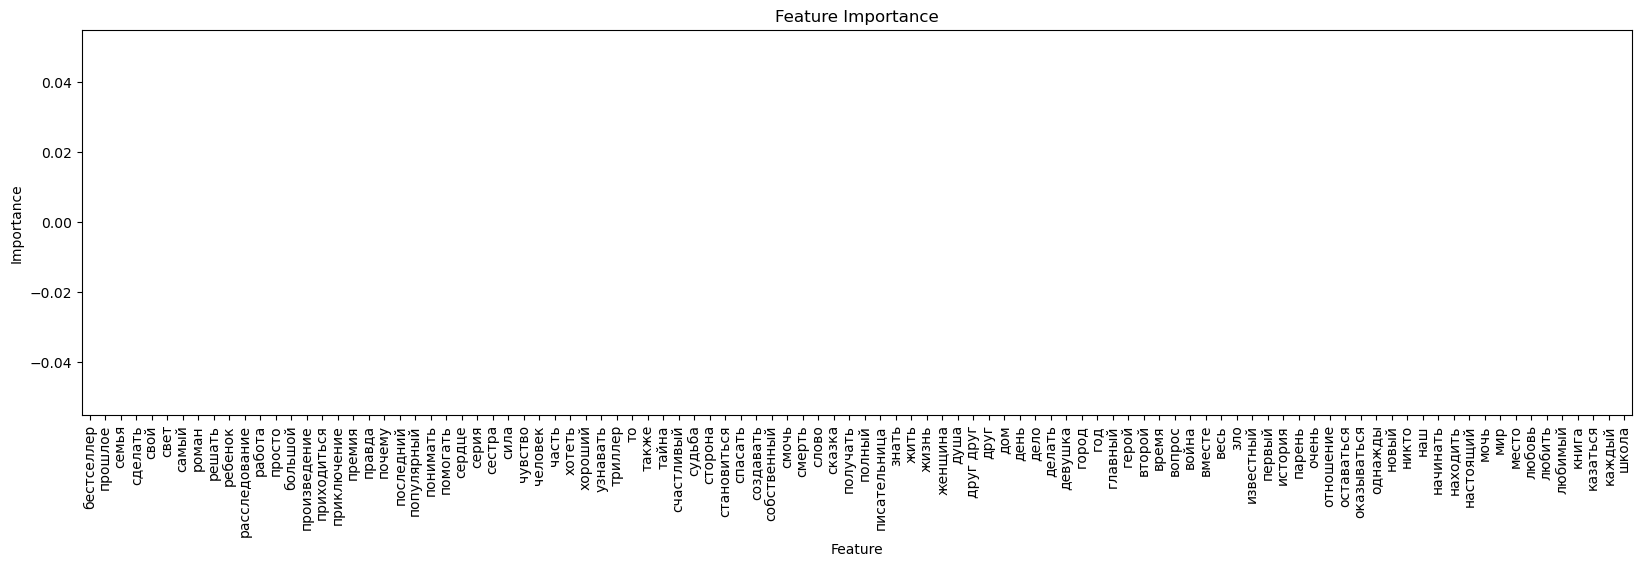

In [76]:
import matplotlib.pyplot as plt
%matplotlib inline

featureImportance = pd.DataFrame({"feature": train_data.columns[regressor.coef_!=1], 
                                  "importance": regressor.coef_[regressor.coef_!=1]})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)

featureImportance["importance"].plot(kind='bar', figsize=(20, 5));    
plt.title("Feature Importance")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()